In [5]:
## Libraries

library(dplyr)
library(tidyr)
library(tidyverse)
library(ggplot2)
require(stringr)
library(purrr)
library(cowplot)
library("readxl")
library(lubridate)

In [ ]:
## Load data

In [1]:
diff_pat <- read.csv('../data/diff_pat.csv')
diff_source <- read.csv('../data/diff_source.csv')
pat_pat_adm_data <- read.csv('../data/pat_pat_adm_data.csv')[,-1]

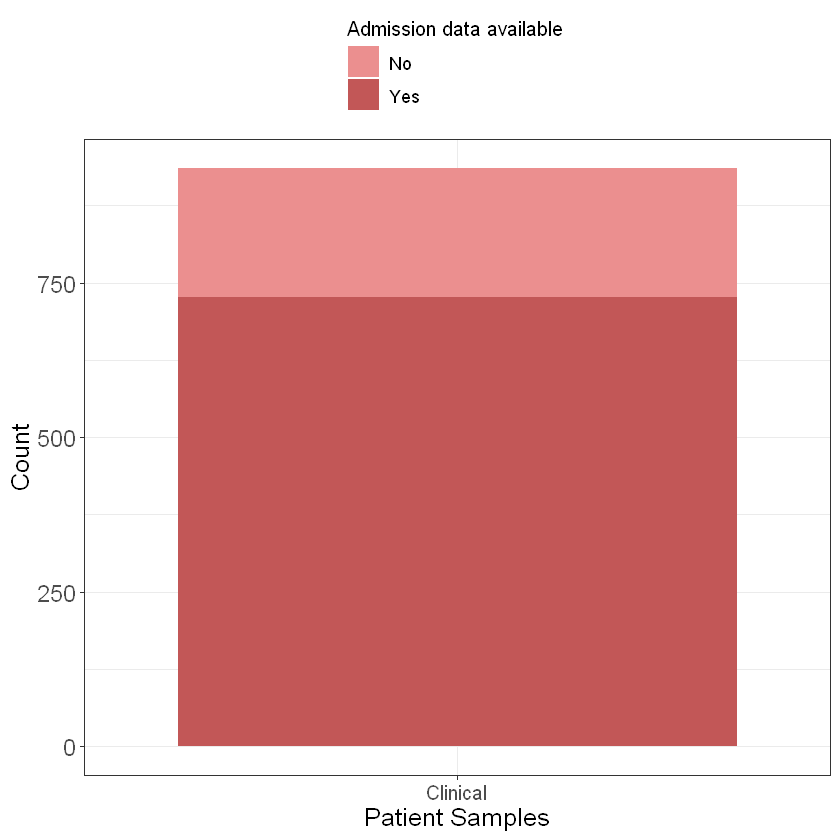

In [6]:
## Admission data availability

fig3E <- pat_pat_adm_data %>% ggplot()+
aes(x=Source, fill=AdmissionData)+
geom_bar(stat = 'count')+xlab('Patient Samples')+ylab("Count")+
theme_bw()+
scale_fill_manual(values = c('#EB8F8F','#C25757'), name='Admission data available')+
theme(axis.title.x = element_text(size=15),
     axis.title.y = element_text(size=15),
     axis.text.x = element_text(size=12),
     axis.text.y = element_text(size=14),
     legend.position='top',
            legend.direction = 'vertical',
      legend.text = element_text(size=11),
      legend.title = element_text(size=12),
     legend.key.size = unit(0.7, "cm"))
fig3E

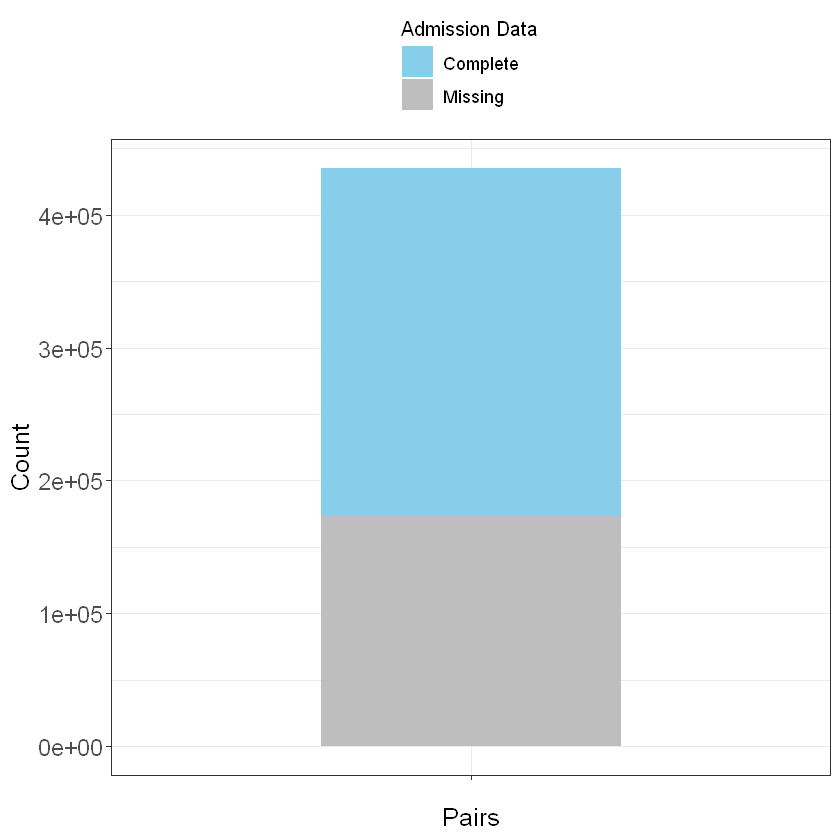

In [7]:
## Admission data pairs

data <- data.frame(
  Category = c("With Adm Data", "Without Adm Data"),
  Value = c(261869, 435289 - 261869)
)

# Create the stacked bar plot
fig3F <- ggplot(data, aes(x = "", y = Value, fill = Category)) +
  geom_bar(stat = "identity", width = 0.5) +
  scale_fill_manual(values = c("With Adm Data"= "skyblue", "Without Adm Data" = "gray"),name='Admission Data',
                    labels=c('Complete','Missing')) +
  labs(    x = "Pairs",
    y = "Count"
  ) +
  theme_bw() +
theme(axis.title.x = element_text(size=15),
     axis.title.y = element_text(size=15),
     axis.text.x = element_text(size=12),
     axis.text.y = element_text(size=14),
     legend.position='top',
            legend.direction = 'vertical',
      legend.text = element_text(size=11),
      legend.title = element_text(size=12),
     legend.key.size = unit(0.7, "cm"))
fig3F



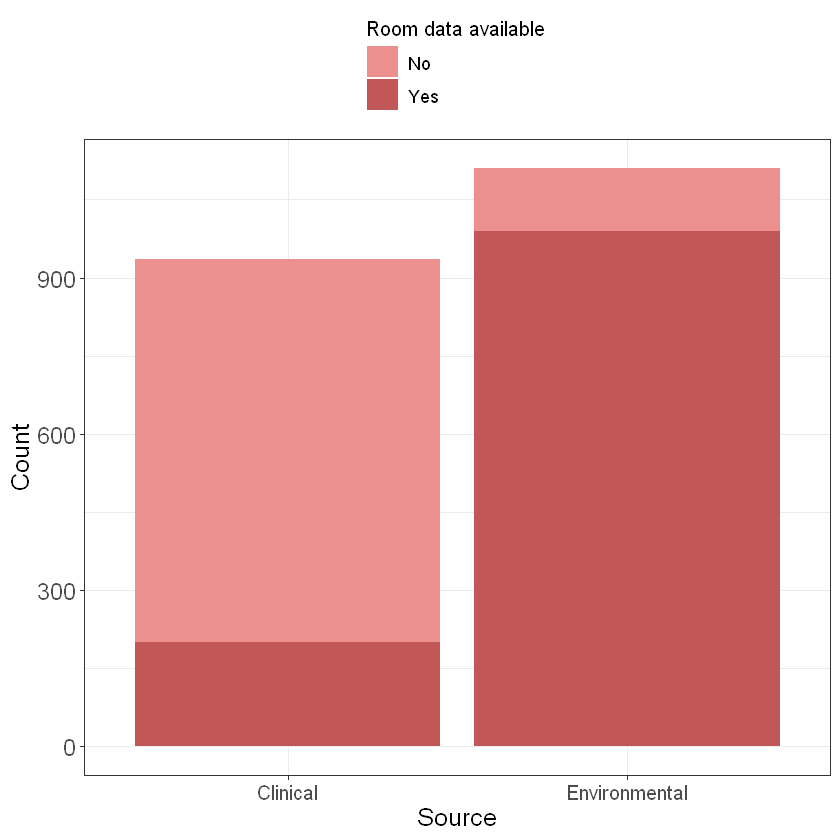

In [8]:
### Proportion of pairs with complete/missing data ####
## room data availability

env_pat_room_data <- rbind(diff_source %>% select(Sample.1,Source.x,nRoom.x) %>% 
rename(sample='Sample.1',Source='Source.x',Room = 'nRoom.x'),

diff_source %>% select(Sample.2,Source.y,nRoom.y) %>% 
rename(sample='Sample.2',Source='Source.y',Room = 'nRoom.y')) %>% 
distinct() %>% 
mutate(RoomData = case_when(is.na(Room) ~ 'No',
                           TRUE ~ 'Yes'))

fig3C <- env_pat_room_data %>% ggplot()+
aes(x=Source, fill=RoomData)+
geom_bar(stat = 'count')+
ylab('Count')+
theme_bw()+
scale_fill_manual(values = c('#EB8F8F','#C25757'), name='Room data available')+
theme(axis.title.x = element_text(size=15),
     axis.title.y = element_text(size=15),
     axis.text.x = element_text(size=12),
     axis.text.y = element_text(size=14),
     legend.position='top',
            legend.direction = 'vertical',
      legend.text = element_text(size=11),
      legend.title = element_text(size=12),
     legend.key.size = unit(0.7, "cm"))

fig3C

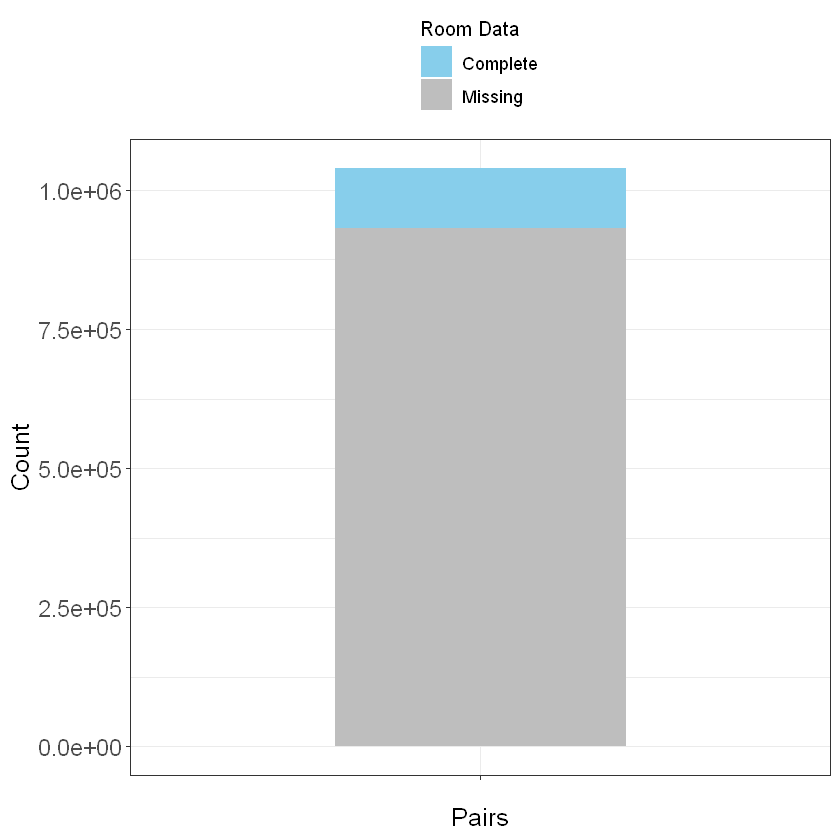

In [9]:
# Create a data frame with the data
data <- data.frame(
  Category = c("With Room Data", "Without Room Data"),
  Value = c(107910, 1039896 - 107910)
)

# Create the stacked bar plot
fig3D <- ggplot(data, aes(x = "", y = Value, fill = Category)) +
  geom_bar(stat = "identity", width = 0.5) +
  scale_fill_manual(values = c("With Room Data"= "skyblue", "Without Room Data" = "gray"),name='Room Data',
                    labels=c('Complete','Missing')) +
  labs(    x = "Pairs",
    y = "Count"
  ) +
  theme_bw() +  
scale_y_continuous(labels = scales::scientific_format())+
theme(axis.title.x = element_text(size=15),
     axis.title.y = element_text(size=15),
     axis.text.x = element_text(size=12),
     axis.text.y = element_text(size=14),
     legend.position='top',
      legend.direction = 'vertical',
      legend.text = element_text(size=11),
      legend.title = element_text(size=12),
     legend.key.size = unit(0.7, "cm"))
fig3D

In [10]:
cdef <- plot_grid(fig3C, fig3D,fig3E, fig3F, ncol=4, align = 'h', labels = c("C","D","E","F"),label_y = 0.82)

In [11]:
ab <- plot_grid(NULL, NULL, ncol = 2, labels = c("A","B"))

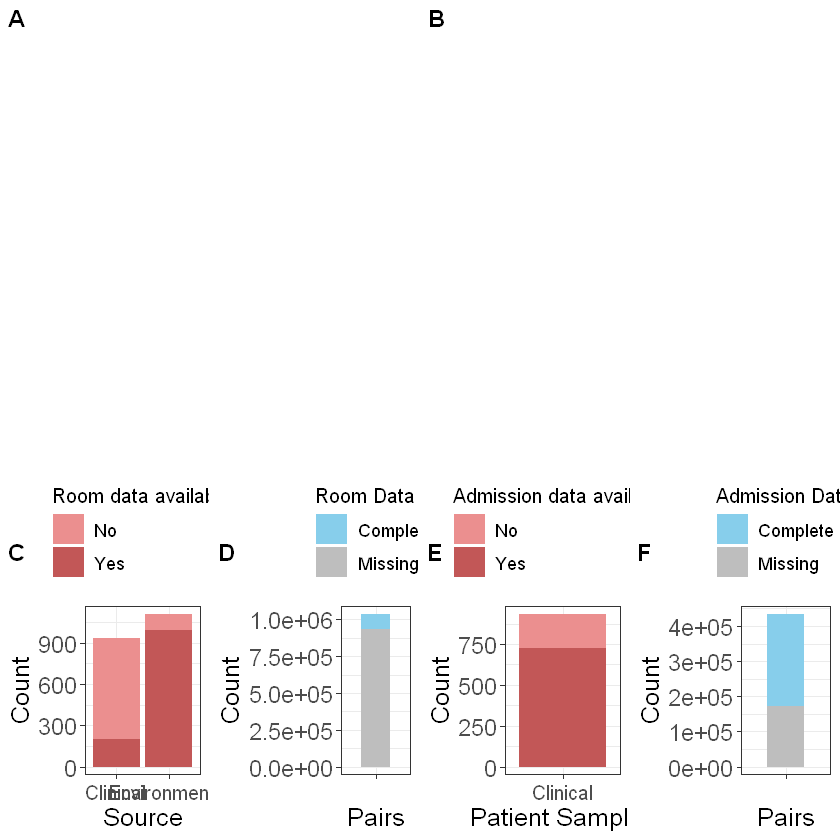

In [12]:
plot_grid(ab, cdef, nrow = 2, rel_heights = c(1,0.8))

ggsave('../output/Figure3.png', device='png', dpi = 450, height = 10, width = 13)